<a href="https://colab.research.google.com/github/prikmm/MLprojects/blob/main/notebooks/Custom_Tensorflow_API_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
tf.constant([[1, 2, 3], [4, 5, 6]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [3]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t.shape)
t.dtype

(2, 3)


tf.float32

In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [7]:
t[: , 1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [8]:
np_t = np.array([[1., 2., 3.], [4., 5., 6.]])
np_t[:, 1, np.newaxis]

array([[2.],
       [5.]])

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
a = np.array([2., 4., 5.])
tf.constant(a)   

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [17]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: ignored

In [18]:
tf.constant(2.) + tf.constant(40., dtype=tf.float64)

InvalidArgumentError: ignored

In [23]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [24]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [25]:
t2 = t2 + 2
t2

<tf.Tensor: shape=(), dtype=float64, numpy=42.0>

In [26]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [27]:
t[0, 0] = 100

TypeError: ignored

In [28]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
print(v)
v.assign(2 * v)
print(v)
v[0, 1].assign(42)
print(v)
v[:, 2].assign([0., 1.])
print(v)
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>


## Custom Loss Function:

In [29]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [31]:
input_shape = X_train.shape[1:]
input_shape

(8,)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

In [33]:
model.compile(loss=huber_fn,
              optimizer="nadam",
              metrics=["mae"])

In [34]:
model.fit(X_train_scaled, y_train, epochs=20,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0844 - mae: 1.4877 - val_loss: 0.3409 - val_mae: 0.6425
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.2211 - mae: 0.5192 - val_loss: 0.2730 - val_mae: 0.5606
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.2003 - mae: 0.4890 - val_loss: 0.2094 - val_mae: 0.4899
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1967 - mae: 0.4843 - val_loss: 0.1785 - val_mae: 0.4568
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1897 - mae: 0.4746 - val_loss: 0.1940 - val_mae: 0.4709
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1905 - mae: 0.4747 - val_loss: 0.1899 - val_mae: 0.4650
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1820 - mae: 0.4623 - val_loss: 0.1833 - val_mae: 0.4613
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.

## Custom Saving and Loading:

In [35]:
model.save("my_model_with_a_custom_loss.h5")

In [36]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [37]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [38]:
model.compile(loss=create_huber(2.0), optimizer="nadam")

In [39]:
model.fit(X_train_scaled, y_train, epochs=20,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1886 - val_loss: 0.1772
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1796 - val_loss: 0.2080
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1954 - val_loss: 0.1889
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1803 - val_loss: 0.2237
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1893 - val_loss: 0.1763
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1804 - val_loss: 0.1981
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1816 - val_loss: 0.1825
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1747 - val_loss: 0.2292
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1846 - val_loss: 0.1941
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1834 - val_loss: 0.1996

In [40]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [41]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [42]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [43]:
model.compile(loss=HuberLoss(2.), optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=20,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1771 - val_loss: 0.1662
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1751 - val_loss: 0.2019
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.1770 - val_loss: 0.1849
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1650 - val_loss: 0.2364
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1741 - val_loss: 0.2169
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1733 - val_loss: 0.2148
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1822 - val_loss: 0.1979
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1701 - val_loss: 0.2155
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1638 - val_loss: 0.1913
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.1708 - val_loss: 0.1938

In [44]:
model.save("my_model_with_custom_loss_class.h5")

In [45]:
model = keras.models.load_model("my_model_with_custom_loss_class.h5", 
                                custom_objects={"HuberLoss": HuberLoss})

## Custom Activation Functions, Initializers, Regularizers, Constraints:

In [46]:
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2./(shape[0] + shape[1]))
    return tf,random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weight):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
    return tf.where(weights < 0, tf.zeros_like(weights), weights)

In [47]:
layer = keras.layers.Dense(30, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [48]:
class MyL1Regularizer(keras.regularizers.Regularizer):

    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {"factor": self.factor}

## Custom Metrics:

In [49]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [50]:
model.fit(X_train_scaled, y_train, epochs=20,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3503 - huber_fn: 0.1725 - val_loss: 0.4241 - val_huber_fn: 0.1729
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3221 - huber_fn: 0.1589 - val_loss: 0.7753 - val_huber_fn: 0.1929
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3431 - huber_fn: 0.1691 - val_loss: 0.7118 - val_huber_fn: 0.1874
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3586 - huber_fn: 0.1697 - val_loss: 1.6268 - val_huber_fn: 0.2147
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3493 - huber_fn: 0.1709 - val_loss: 3.3651 - val_huber_fn: 0.2485
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3544 - huber_fn: 0.1671 - val_loss: 1.9134 - val_huber_fn: 0.2199
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3469 - huber_fn: 0.1692 - val_loss: 1.0350 - val_huber_fn: 0.1981
Epoch 

In [51]:
precision = keras.metrics.Precision()

In [52]:
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [53]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [54]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [55]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [56]:
precision.reset_states()

In [57]:
class HuberLoss(keras.metrics.Metric):
    def __init__(self, threshold=0.1, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

## Custom Layers:

In [58]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [59]:
class MyDense(keras.layers.Layer):

    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(name="kernel",
                                      shape=[batch_input_shape[-1], self.units],
                                      initializer="glorot_normal")
        self.bias = self.add_weight(name="bias",
                                    shape=[self.units],
                                    initializer="zeros")
        super().build(batch_input_shape)  # must be at the end

    def call(self, x):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + self.units)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [60]:
class MyMultiLayer(keras.layers.Layer):

    def call(self, X):
        X1, X2 = X
        return [X1 + X2, X1 * X2, X1 / X2]

    def compute_output_shape(self, batch_input_shape):
        b1, b2 = batch_input_shape
        return [b1, b1, b1]

In [61]:
class MyGaussianNoise(keras.layers.Layer):

    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

## Custom Models:

In [62]:
class ResidualBlock(keras.layers.Layer):

    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]
    
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [63]:
class ResidualRegressor(keras.Model):

    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [64]:
class ReconstructingRegressor(keras.Model):

    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activatio="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        return self.out(Z)

In [65]:
def f(w1, w2):
    return 3 * w1**2 + 2 * w1 * w2

In [66]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [67]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [68]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [69]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [70]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)

RuntimeError: ignored

In [71]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape

In [72]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [73]:
gradients

[None, None]

In [74]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [76]:
def f(w1, w2):
    return 3 * w1**2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [77]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [78]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [79]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>]

## Custom Training Loops:

In [80]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [81]:
def random_batch(X, y, batch_size=13):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [82]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                          for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics, 
          end=end)

In [83]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [84]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 - mean: 1.7900 - mean_absolute_error: 0.5947
Epoch 2/5
11610/11610 - mean: 0.7395 - mean_absolute_error: 0.5322
Epoch 3/5
11610/11610 - mean: 0.7081 - mean_absolute_error: 0.5399
Epoch 4/5
11610/11610 - mean: 0.6481 - mean_absolute_error: 0.5232
Epoch 5/5
11610/11610 - mean: 0.6448 - mean_absolute_error: 0.5187


## TensorFlow Graph and Functions:

In [85]:
def cube(x):
    return x**3

In [86]:
cube(2)

8

In [87]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [88]:
tf_cube = tf.function(cube)
tf_cube

In [89]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [90]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [91]:
@tf.function
def tf_cube(x):
    return x**3

In [92]:
print(tf_cube(2))
print(tf_cube.python_function(2))

tf.Tensor(8, shape=(), dtype=int32)
8


In [93]:
tf.range(0, 10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [94]:
tf.constant(np.arange(0, 10))

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

# Solutions:


### 12.

In [127]:
class NormalizationLayer(keras.layers.Layer):
    
    def __init__(self, eps=0.001, **kwargs):
        super().__init__(**kwargs)
        self.eps = tf.cast(eps, dtype=tf.float32)

    def build(self, batch_input_shape):
        self.alpha = self.add_weight(name="alpha", shape=batch_input_shape[-1:],
                                      initializer="ones")
        self.beta = self.add_weight(name="beta", shape=batch_input_shape[-1:],
                                     initializer="zeros")
        super().build(batch_input_shape)
        
    def call(self, X):
        means, variances = tf.nn.moments(X, axes=-1, keepdims=True)
        normalized_X = self.alpha * (X - means)/ tf.sqrt(variances + self.eps) + self.beta
        print("Custom Layer working fine")
        return normalized_X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

    def get_config(self):
        base_config = super().get_config()
        return {**base_config,
                "eps": self.eps}

In [143]:
X = X_train.astype(np.float32)

custom_normalization_layer = NormalizationLayer()
keras_normalization_layer = keras.layers.LayerNormalization()

cust_normalized_X = custom_normalization_layer(X)
keras_normalized_X = keras_normalization_layer(X)

mae_for_X = keras.losses.MeanAbsoluteError()
tf.reduce_mean(mae_for_X(keras_normalized_X, cust_normalized_X))

Custom Layer working fine


<tf.Tensor: shape=(), dtype=float32, numpy=5.496049e-08>

In [146]:
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_normalization_layer.set_weights([random_alpha, random_beta])
keras_normalization_layer.set_weights([random_alpha, random_beta])

cust_normalized_X = custom_normalization_layer(X)
keras_normalized_X = keras_normalization_layer(X)

tf.reduce_mean(mae_for_X(keras_normalized_X, cust_normalized_X))

Custom Layer working fine


<tf.Tensor: shape=(), dtype=float32, numpy=2.8953222e-08>

### 13.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
train = fashion_mnist[0]
test = fashion_mnist[1]

X_train_full = train[0]
y_train_full = train[1]

X_test = test[0]
y_test = test[1]

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                      test_size=0.2)

dataset_desc = (("Train", X_train, y_train), ("Valid", X_valid, y_valid), ("Test", X_test, y_test))

for name, data, target in dataset_desc:
    print(f'{name}-------')
    print("Data: ", data.shape)
    print("Target: ", target.shape)
    print()

4423680/4422102 [==============================] - 0s 0us/step
Train-------
Data:  (48000, 28, 28)
Target:  (48000,)

Valid-------
Data:  (12000, 28, 28)
Target:  (12000,)

Test-------
Data:  (10000, 28, 28)
Target:  (10000,)



In [3]:
y_uniq = np.unique(y_train)
y_uniq

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

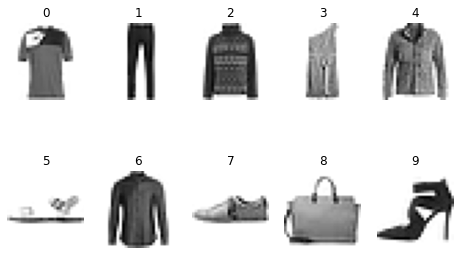

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(8, 5), nrows=2, ncols=5)

for i in y_uniq:
    row = 0 if i < 5 else 1
    col = i % 5
    image_idx = np.where(y_train == i)
    image = X_train[image_idx[0][0]]
    axs[row, col].imshow(image, cmap="binary")
    axs[row, col].axis("off")
    axs[row, col].set_title(i)

In [5]:
X_train_scaled = X_train.astype(np.float32) / 255
X_valid_scaled = X_valid.astype(np.float32) / 255
X_test_scaled = X_test.astype(np.float32) / 255

In [6]:
def random_batch(X, y, batch_size=13):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

def print_status_bar(iteration, total, loss, metrics=None, val_loss=None, val_acc=None):
    metric_info = " - ".join([f'{m.name}: {m.result():.4f}' for m in [loss] + metrics])
    normal_print = "\r{}/{} - ".format(iteration, total) + metric_info
    end = "" if iteration < total else "\n"
    val_stats = (("val_loss", val_loss), ("val_accuracy", val_acc))
    val_info = " - " + " - ".join([f'{name}: {stat.result():.4f}'
                                                    for name, stat in val_stats])
    print(normal_print + val_info, end=end)

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax"),
])


n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
val_acc = keras.metrics.SparseCategoricalAccuracy()
val_mean_loss = keras.metrics.Mean()

for epoch in tf.range(1, n_epochs + 1):
    print(f'Epoch: {epoch}/{n_epochs}:')
    
    for step in tf.range(1, n_steps + 1):
        X_train_batch, y_train_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_train_batch, y_train_batch)
            main_loss = tf.reduce_mean(loss_fn(y_train_batch, y_pred))
            loss = tf.add_n([main_loss], model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        mean_loss(loss)
        for metric in metrics:
            metric(y_train_batch, y_pred)
        y_val_pred = model(X_valid, y_valid)
        main_val_loss = tf.reduce_mean(loss_fn(y_valid, y_val_pred))
        val_loss = tf.add_n([main_val_loss], model.losses)
        val_mean_loss(val_loss)
        val_acc(y_valid, y_val_pred)
        print_status_bar(step * batch_size, len(y_train),
                        mean_loss, metrics, val_mean_loss, val_acc)
        val_mean_loss.reset_states()
    
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch: 1/5:
48000/48000 - mean: 0.9916 - sparse_categorical_accuracy: 0.6942 - val_loss: 359.8257 - val_accuracy: 0.5571
Epoch: 2/5:
48000/48000 - mean: 0.7688 - sparse_categorical_accuracy: 0.7592 - val_loss: 1050.6810 - val_accuracy: 0.5235
Epoch: 3/5:
48000/48000 - mean: 0.7273 - sparse_categorical_accuracy: 0.7793 - val_loss: 2432.8972 - val_accuracy: 0.4681
Epoch: 4/5:
48000/48000 - mean: 0.6704 - sparse_categorical_accuracy: 0.7968 - val_loss: 2815.0449 - val_accuracy: 0.4514
Epoch: 5/5:
48000/48000 - mean: 0.6393 - sparse_categorical_accuracy: 0.8100 - val_loss: 2913.5037 - val_accuracy: 0.4352


In [12]:
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
])

upper_layers = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax"),
])

model = keras.models.Sequential([
    lower_layers, upper_layers
])

n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizers = [keras.optimizers.Nadam(lr=3e-3), keras.optimizers.RMSprop(lr=3e-3)]
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
val_acc = keras.metrics.SparseCategoricalAccuracy()
val_mean_loss = keras.metrics.Mean()

for epoch in tf.range(1, n_epochs + 1):
    print(f'Epoch: {epoch}/{n_epochs}:')
    
    for step in tf.range(1, n_steps + 1):
        X_train_batch, y_train_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape(persistent=True) as tape:
            y_pred = model(X_train_batch, y_train_batch)
            main_loss = tf.reduce_mean(loss_fn(y_train_batch, y_pred))
            loss = tf.add_n([main_loss], model.losses)
        
        for optimizer, layers in zip(optimizers, [lower_layers, upper_layers]):
            gradients = tape.gradient(loss, layers.trainable_variables)
            optimizer.apply_gradients(zip(gradients, layers.trainable_variables))

        del tape

        mean_loss(loss)
        for metric in metrics:
            metric(y_train_batch, y_pred)
        y_val_pred = model(X_valid, y_valid)
        main_val_loss = tf.reduce_mean(loss_fn(y_valid, y_val_pred))
        val_loss = tf.add_n([main_val_loss], model.losses)
        val_mean_loss(val_loss)
        val_acc(y_valid, y_val_pred)
        print_status_bar(step * batch_size, len(y_train),
                        mean_loss, metrics, val_mean_loss, val_acc)
        val_mean_loss.reset_states()
    
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch: 1/5:
48000/48000 - mean: 0.7666 - sparse_categorical_accuracy: 0.7421 - val_loss: 160.1703 - val_accuracy: 0.5512
Epoch: 2/5:
48000/48000 - mean: 0.6172 - sparse_categorical_accuracy: 0.8018 - val_loss: 326.6970 - val_accuracy: 0.5408
Epoch: 3/5:
48000/48000 - mean: 0.5821 - sparse_categorical_accuracy: 0.8093 - val_loss: 288.9071 - val_accuracy: 0.5403
Epoch: 4/5:
48000/48000 - mean: 0.5335 - sparse_categorical_accuracy: 0.8268 - val_loss: 529.6296 - val_accuracy: 0.5524
Epoch: 5/5:
48000/48000 - mean: 0.5391 - sparse_categorical_accuracy: 0.8291 - val_loss: 515.5553 - val_accuracy: 0.5499
